In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_excel("data.xlsx")
df.sort_values('seqn', ascending=True)

,seqn,Idade,Sexo,Estado Civil,Renda,Raça,Cintura,BMI,Albuminuria,UrAlbCr,UricAcid,Glicose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,233.0,0,388,49,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,801.0,232.0,0,855,45,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,696.0,201.0,0,507,54,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,1204.0,333.0,0,522,5,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,811.0,201.0,0,813,5,95,43,126,No MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,597.0,0,2211,58,152,57,107,No MetSyn
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,29,79,91,90,91,No MetSyn
2398,71909,28,Male,Single,800.0,MexAmerican,1008.0,294.0,0,278,62,99,47,84,No MetSyn
2399,71911,27,Male,Married,8200.0,MexAmerican,1066.0,313.0,0,415,62,100,41,124,MetSyn


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Idade              2401 non-null   int64  
 2   Sexo               2401 non-null   object 
 3   Estado Civil       2193 non-null   object 
 4   Renda              2284 non-null   float64
 5   Raça               2401 non-null   object 
 6   Cintura            2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   int64  
 10  UricAcid           2401 non-null   int64  
 11  Glicose            2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(3), int64(8), object(4)
memory usage: 281.5+ KB


In [4]:
text_columns = df.select_dtypes(include=[object]).columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

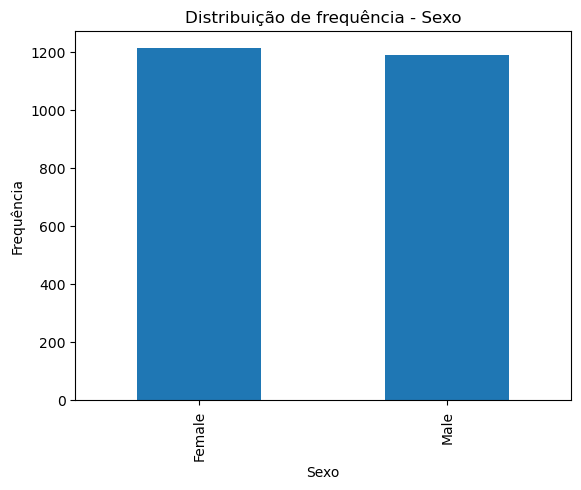

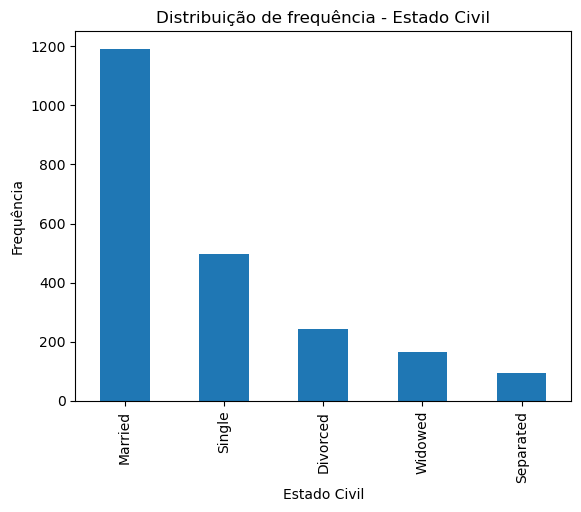

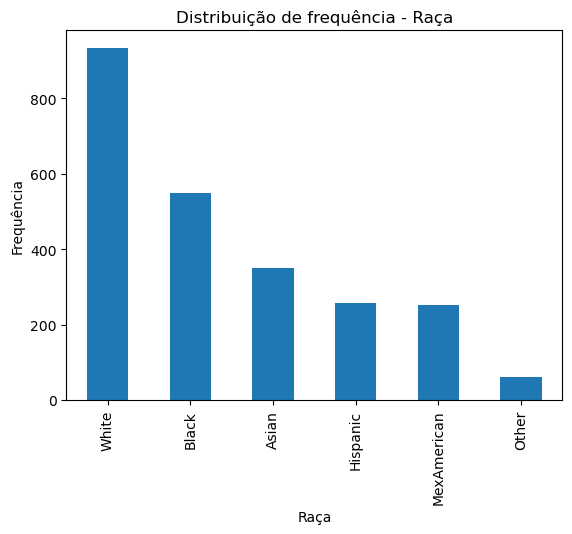

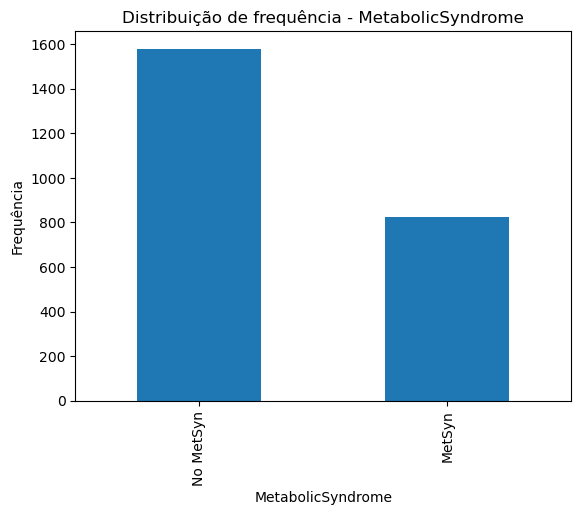

In [5]:
import matplotlib.pyplot as plt

for coluna in text_columns:
    frequencia = df[coluna].value_counts()
    plt.figure()
    frequencia.plot(kind='bar')
    plt.title(f'Distribuição de frequência - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

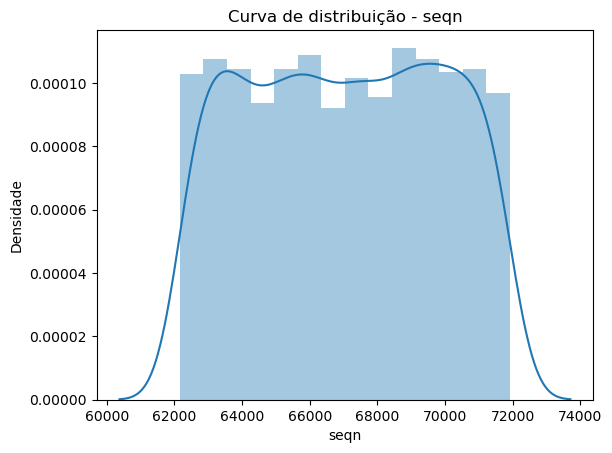

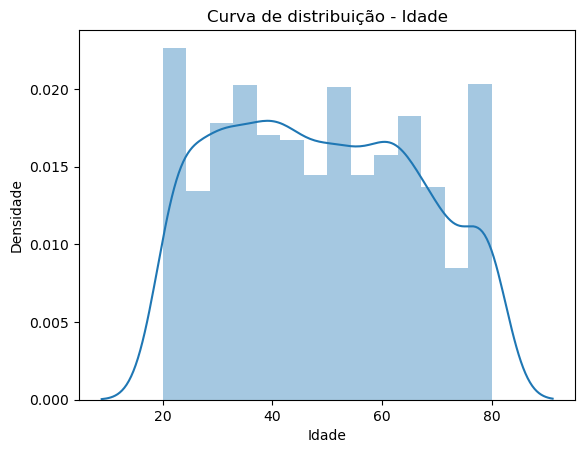

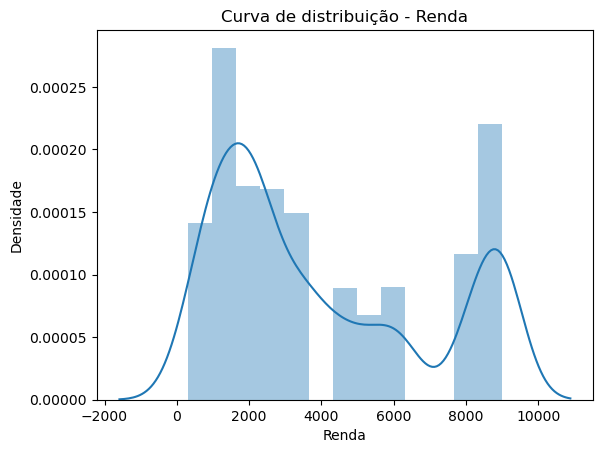

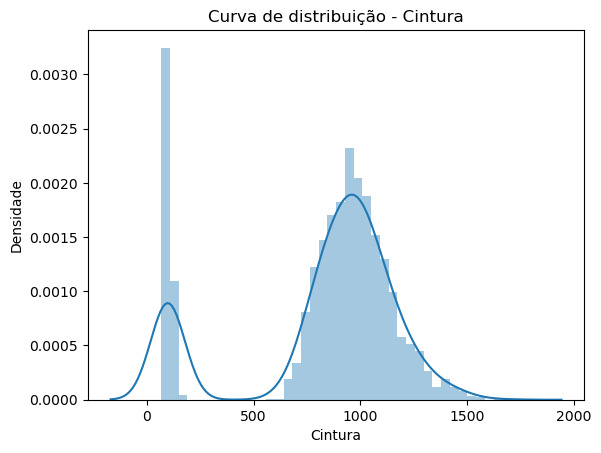

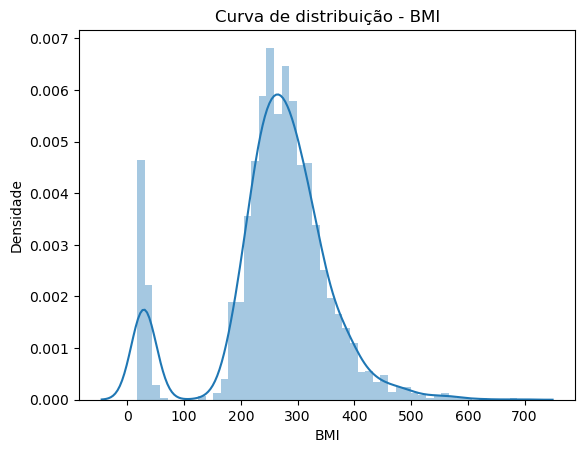

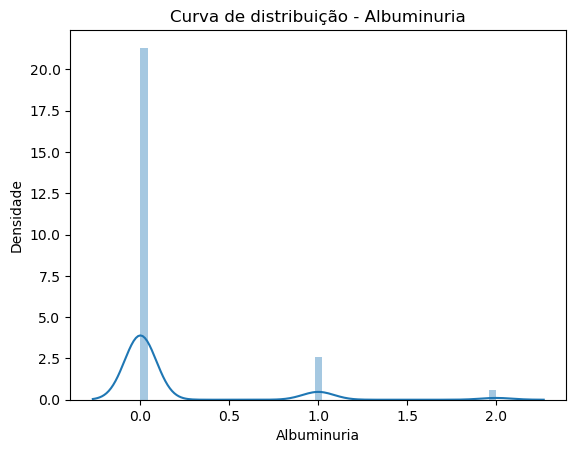

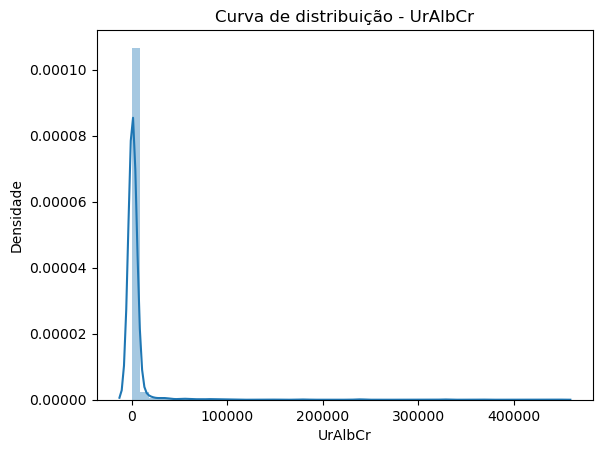

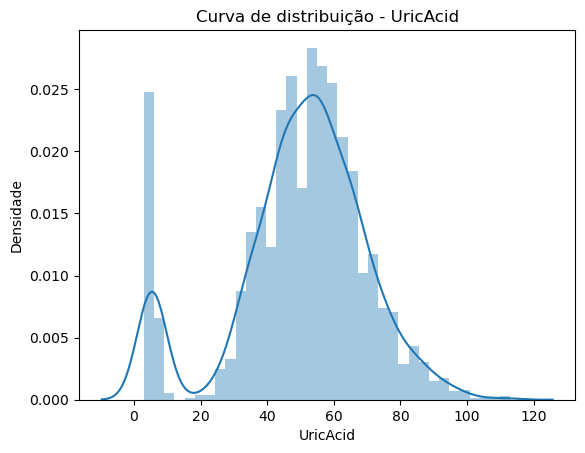

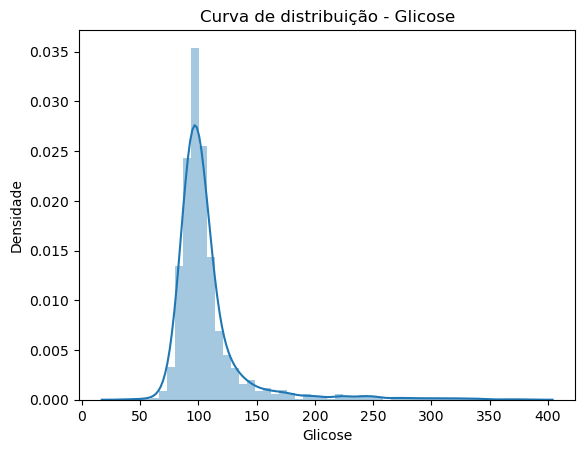

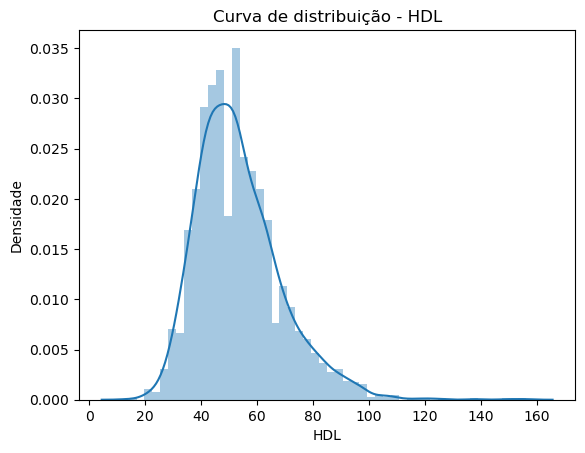

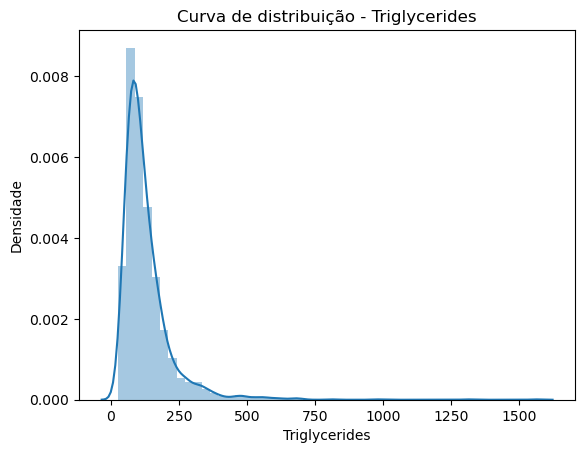

In [6]:
import seaborn as sns

for coluna in numeric_columns:
    plt.figure()
    sns.distplot(df[coluna].dropna(), kde=True, hist=True)
    plt.title(f'Curva de distribuição - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.show()

In [7]:
""" ENCODER INSTANCE """

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['MetabolicSyndrome'] = df['MetabolicSyndrome'].map({'MetSyn': 1, 'No MetSyn': 0})
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].astype(int)

df_encoded = df.copy()

text_columns = df.select_dtypes(include=[object]).columns

for column in text_columns:
    
    df_encoded[column] = label_encoder.fit_transform(df[column])
    
    print("Labels Encoded: ",label_encoder.classes_)

Labels Encoded:  ['Female' 'Male']
Labels Encoded:  ['Divorced' 'Married' 'Separated' 'Single' 'Widowed' nan]
Labels Encoded:  ['Asian' 'Black' 'Hispanic' 'MexAmerican' 'Other' 'White']


In [8]:
""" DATA CLEANING """

df_encoded['Renda'] = df_encoded['Renda'].fillna(df_encoded['Renda'].median())

df_encoded['Cintura'] = df_encoded['Cintura'].fillna(df_encoded['Cintura'].mean())

df_encoded['BMI'] = df_encoded['BMI'].fillna(df_encoded['BMI'].mean())

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Idade              2401 non-null   int64  
 2   Sexo               2401 non-null   int64  
 3   Estado Civil       2401 non-null   int64  
 4   Renda              2401 non-null   float64
 5   Raça               2401 non-null   int64  
 6   Cintura            2401 non-null   float64
 7   BMI                2401 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   int64  
 10  UricAcid           2401 non-null   int64  
 11  Glicose            2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 281.5 KB


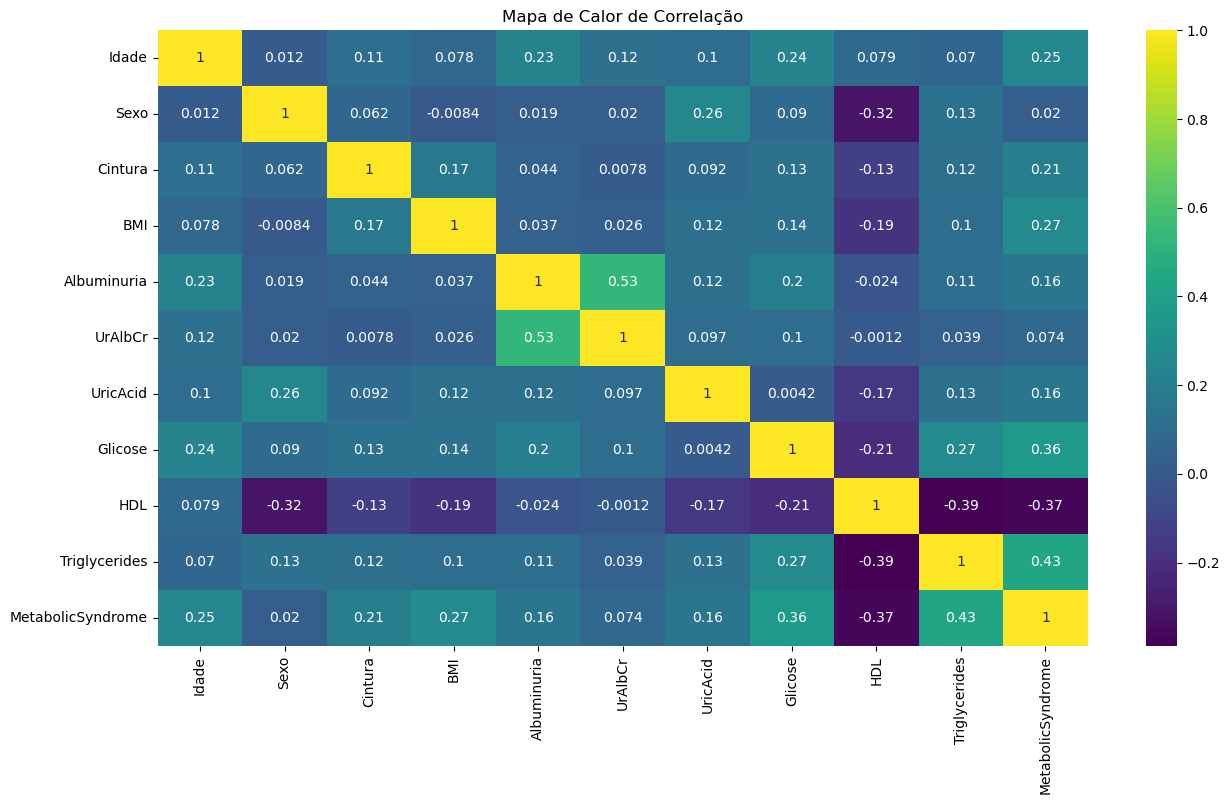

Index(['MetabolicSyndrome', 'Triglycerides', 'HDL', 'Glicose', 'BMI', 'Idade'], dtype='object')


In [9]:
""" CORRELATION MAP """

data = df_encoded[[
       'Idade', 'Sexo', 'Cintura',
       'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'Glicose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'
]]

correlation_matrix = data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Mapa de Calor de Correlação')
plt.show()


explain_features = correlation_matrix[['MetabolicSyndrome']].abs().nlargest(6, 'MetabolicSyndrome').index
print(explain_features)

In [22]:
geral_int_features = ['Idade','Cintura','BMI', 'Albuminuria', 'UrAlbCr', 
                      'UricAcid','Glicose', 'HDL','Triglycerides']

selected_features = ['Triglycerides', 'HDL', 'Glicose', 'Idade']

tipical_features = []

target = 'MetabolicSyndrome'

In [30]:
""" FEATURE SCALING """
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# X = scaler.fit_transform(df_encoded[geral_int_features])
X = scaler.fit_transform(df_encoded[selected_features])

y = df_encoded[target]

In [31]:
""" SPLITING TRAIN/TEST DATA """

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [32]:
""" MODEL SELECTED: LOGISTIC REGRESSOR """

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

clf.predict(X_test[:2, :])

clf.predict_proba(X_test[:2, :])

clf.score(X_test, y_test)

0.8224687933425797

Recall: 0.6963562753036437
F-Score: 0.7288135593220341


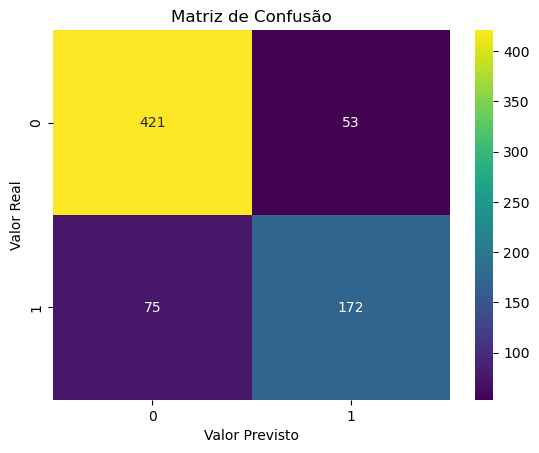

In [33]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)

print("Recall:", recall)
print("F-Score:", fscore)

sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de Confusão')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.show()

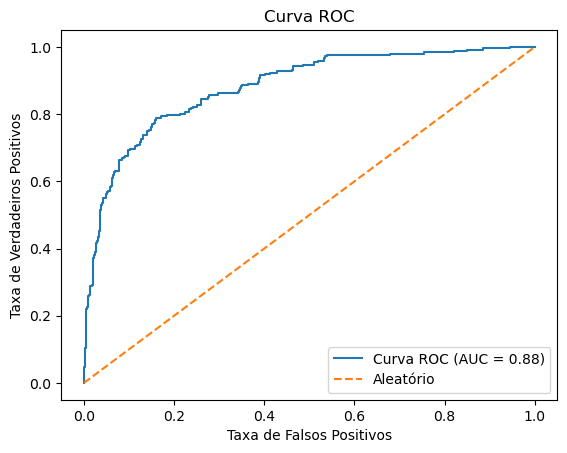

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve

# Obter as probabilidades previstas
probs = clf.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calcular a área sob a curva ROC
auc = roc_auc_score(y_test, probs)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()